# 1. Introduction

## 1.1 Members
 - Ardit Nela
 - Bisera Nikoloska
 - Lovro Oražem
 - Grigor Ristov

## 1.2 Goals
The past year we have been faced with a very difficult period with the first pandemic many of us have seen. With that we have a lot of problems, mainly the amount of hospitilizaed people. With our project we hope to show the amount of people affected because of this horrible pandemic, depending on the gender, age, place of residence and many other different parameters.

## 1.3 Technoligies used
Regarding the technologies we used. We are using Python, pcaxis files for the source, for libraries numpy, pandas, matplotlib for mapping out graphs and making the data we recieve usable, and for reading the pcaxis file we used an external library pyaxis.

## 1.4 Data processing
With regards to the data, we got it from the Slovenian Ministry of Public Administration, from podatki.gov with the name "Število hospitalizacij zaradi bolezni, po spolu in statističnih regijah, Slovenija, letno". The data we got was in a pcaxis file format we later reprocessed it using the pyaxis library and made it usable.

# 2. Data analysis

In [1]:
from pyaxis import pyaxis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_loglevel('WARNING')

## 2.1 First dataset
We begin by looking at the "Število hospitalizacij zaradi bolezni, po glavnih diagnozah (MKB-10, poglavja) in spolu, Slovenija, letno" dataset. We load it in and see what it contains.

In [2]:
URL = "https://podatki.nijz.si/DB/NIJZ%20podatkovni%20portal/4%20Zdravstveno%20varstvo/06%20Bolni%C5%A1ni%C4%8Dne%20obravnave/1%20Hospitalizacije%20zaradi%20bolezni/BO04.px"
px = pyaxis.parse(URL, encoding='ANSI')
data = px['DATA']
data["DATA"] = data["DATA"].astype(int)

print(data.head(20))

    Leto           Spol                           Poglavje glavne diagnoze  \
0   2003  Spol - SKUPAJ                                  Poglavje - SKUPAJ   
1   2003  Spol - SKUPAJ  Nekatere infekcijske in parazitske bolezni (A0...   
2   2003  Spol - SKUPAJ                                Neoplazme (C00-D48)   
3   2003  Spol - SKUPAJ      Bolezni krvi in krvotvornih organov (D50-D89)   
4   2003  Spol - SKUPAJ  Endokrine, prehranske in presnovne bolezni (E0...   
5   2003  Spol - SKUPAJ              Duševne in vedenjske motnje (F00-F99)   
6   2003  Spol - SKUPAJ                         Bolezni živèevja (G00-G99)   
7   2003  Spol - SKUPAJ                Bolezni oèesa in adneksov (H00-H59)   
8   2003  Spol - SKUPAJ                Bolezni ušesa in mastoida (H60-H95)   
9   2003  Spol - SKUPAJ                          Bolezni obtoèil (I00-I99)   
10  2003  Spol - SKUPAJ                            Bolezni dihal (J00-J99)   
11  2003  Spol - SKUPAJ                         Bolezni prebavil

Initially we decided to look for correlations in the data. For this we used the built-in pearson function.

In [3]:
diagnosesArr = data["Poglavje glavne diagnoze"].astype("category").cat.codes
diagnosesArr = diagnosesArr.to_numpy()
hospitalizations = data["DATA"].to_numpy()
corr = np.corrcoef(diagnosesArr, hospitalizations)
print("Correlation between diagnoses and hospitalizations", corr[0][1])

genderArr = data["Spol"].astype("category").cat.codes
genderArr = genderArr.to_numpy()
corr = np.corrcoef(genderArr, hospitalizations)
print("Correlation between gender and hospitalizations", corr[0][1])

Correlation between diagnoses and hospitalizations 0.16842586928534037
Correlation between gender and hospitalizations 0.12922865457777444


Then, we decided to find the 5 diseases which result in the most hospitalizations in total.

In [4]:
diagnoses = dict()
for index, row in data.iterrows():
    if row["Poglavje glavne diagnoze"] not in diagnoses:
        diagnoses[row["Poglavje glavne diagnoze"]] = 0
    diagnoses[row["Poglavje glavne diagnoze"]] += int(row["DATA"])


diagnoses = dict(sorted(diagnoses.items(), key=lambda item: item[1]))
dKeys = list(diagnoses.keys())[-6:-1]
dVals = list(diagnoses.values())[-6:-1]
diagnoses = dict(zip(dKeys, dVals))
print(diagnoses)

{'Bolezni seèil in spolovil (N00-N99)': 735056, 'Bolezni prebavil (K00-K93)': 955578, 'Bolezni dihal (J00-J99)': 962024, 'Neoplazme (C00-D48)': 1234724, 'Bolezni obtoèil (I00-I99)': 1376298}


We define a function that will plot the number of hospitalizations by gender and diagnosis throughout the years.

In [5]:
def graphOverTime(diagnosis):
    tempData1 = data[data["Spol"] == "Moški"];
    tempData2 = data[data["Spol"] == "Ženski"];
    tempData1 = tempData1[tempData1["Poglavje glavne diagnoze"] == diagnosis];
    tempData2 = tempData2[tempData2["Poglavje glavne diagnoze"] == diagnosis];
    plt.figure(figsize=(10, 5));
    plt.xticks(rotation="vertical");
    plt.title(diagnosis);
    plt.plot(tempData1["Leto"], tempData1["DATA"], label="Moški");
    plt.plot(tempData2["Leto"], tempData2["DATA"], label="Ženski");
    plt.legend();
    #plt.show()

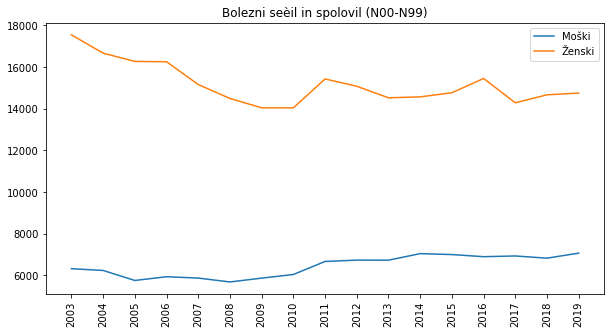

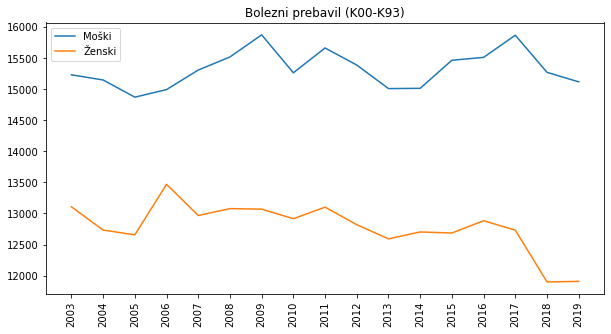

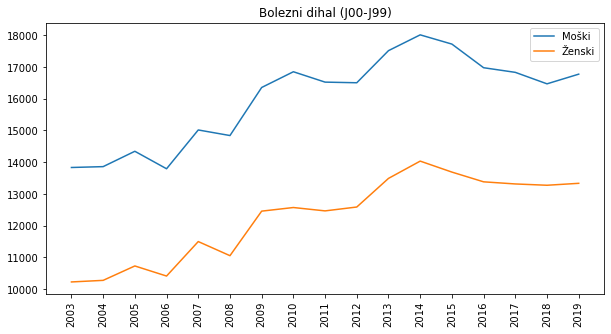

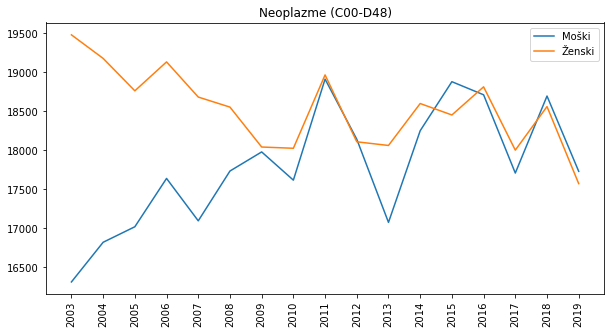

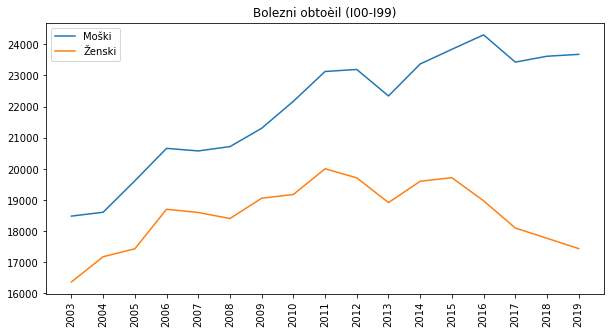

In [6]:
import warnings
warnings.filterwarnings("ignore");

for diagnosis in diagnoses.keys():
    graphOverTime(diagnosis);

In [1]:
print("TEST")

TEST


In [1]:
print("Bisera")

Bisera


# Number of people in hospitals by genders and statistical regions

We used another dataset where we get the hospital occupancy based on genders and the statistical regions. We have 13 different statistical regions and 4 different genders that are tracked from year 2003 till 2019.

In [30]:
from pyaxis import pyaxis
import matplotlib.pyplot as plt
import numpy as np

URL = "https://podatki.nijz.si/DB/NIJZ%20podatkovni%20portal/4%20Zdravstveno%20varstvo/06%20Bolni%C5%A1ni%C4%8Dne%20obravnave/1%20Hospitalizacije%20zaradi%20bolezni/BO01.px"
px = pyaxis.parse(URL, encoding='ANSI')
data = px['DATA']

print(data)

      Leto           Spol    Statistièna regija    DATA
0     2003  Spol - SKUPAJ             SLOVENIJA  256405
1     2003  Spol - SKUPAJ              Pomurska   18539
2     2003  Spol - SKUPAJ             Podravska   39421
3     2003  Spol - SKUPAJ               Koroška   11181
4     2003  Spol - SKUPAJ             Savinjska   36549
...    ...            ...                   ...     ...
1185  2019        Neznano             Gorenjska       0
1186  2019        Neznano  Primorsko-notranjska       0
1187  2019        Neznano               Goriška       0
1188  2019        Neznano         Obalno-kraška       0
1189  2019        Neznano                Tujina       0

[1190 rows x 4 columns]


In [31]:
spol = data['Spol'].values
dataset = data['DATA'].values
regija = data['Statistièna regija'].values
leto = data['Leto'].values

In [36]:
z=0
spollist= []
for i in spol:
   if i  in spollist:
      z+=1
   else:
        spollist.append(i)


    

In [37]:
porazdelitev1 = [0] * len(spollist)
diction = {}
i=0
for spol1 in spollist:
    if spol1 != ('Spol - SKUPAJ'):
        for j in range(0,len(spol)):
            if spol1 == spol[j]:
                porazdelitev1[i] += int(dataset[j])
        diction[spol1] = porazdelitev1[i]
        i+=1


We compared the occupancy based on genders and we can see that in the hospital in the past 15 years, more percentage of the occupancy goes to women also undetermined and unknown are not significally important


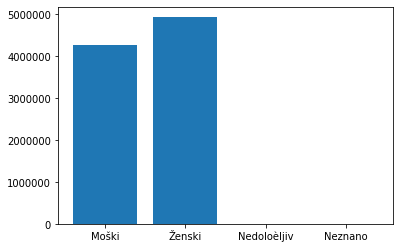

In [38]:
plt.bar(list(diction.keys()), list(diction.values()))
plt.show()

In [39]:
 letolist =[]
z=0
for i in leto:
    if i  in letolist:
      z+=1
    else:
        letolist.append(i)
letolist.sort()


In [40]:

zenski=dict()
moski=dict()

for letoq in letolist:
    count=0
    count1=0
    for j in range(0,len(leto)-1):
        if letoq == leto[j] and spol[j] == 'Ženski' and regija[j] == "SLOVENIJA":
            count += int(dataset[j])
        if letoq == leto[j] and spol[j] == 'Moški'  and regija[j] == "SLOVENIJA":
            count1 += int(dataset[j])    
    letoq=int(letoq)
    zenski[letoq] = count
    moski[letoq] = count1
zenski = dict(sorted(zenski.items()))
moski = dict(sorted(moski.items()))
print(zenski)
print(moski)

{2003: 140531, 2004: 142172, 2005: 141189, 2006: 146770, 2007: 148524, 2008: 146004, 2009: 152814, 2010: 149673, 2011: 149731, 2012: 147727, 2013: 141278, 2014: 145852, 2015: 148497, 2016: 146134, 2017: 139881, 2018: 140703, 2019: 140157}
{2003: 115874, 2004: 116493, 2005: 116668, 2006: 119773, 2007: 123111, 2008: 123528, 2009: 126154, 2010: 125130, 2011: 128023, 2012: 127207, 2013: 129467, 2014: 132613, 2015: 134941, 2016: 133608, 2017: 130302, 2018: 129610, 2019: 129985}


In this part we created a graph of the previous 15 years to compare the occupancy between the men and women and we can see that almost every year the occupancy by the women is higher than the occupancy of the men, also there are years that are quite close almost equal


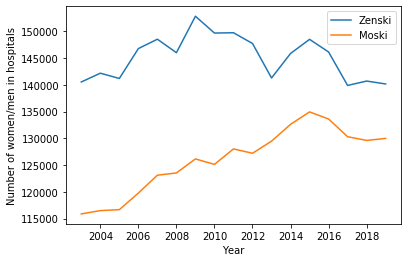

In [41]:

plt.plot(list(zenski.keys()), list(zenski.values()),label = "Zenski")
plt.plot(list(moski.keys()), list(moski.values()),label = "Moski")
plt.xlabel('Year')
plt.ylabel('Number of women/men in hospitals')
plt.legend()
plt.show()

In [43]:

dictot = dict()
for letoq in letolist:
    counttot=0
    for j in range(0,len(leto)):
        if letoq == leto[j] and spol[j] == 'Spol - SKUPAJ' and regija[j]== 'SLOVENIJA':
            counttot += int(dataset[j])
    letoq=int(letoq)
    dictot[letoq] = counttot
dictot = dict(sorted(dictot.items()))


We also plotted a graph of the hospital occupancy over the past 15 years and we can see that the peak of the hospital occupancy is in 2015 and we can see that the least number of used beds are in 2003

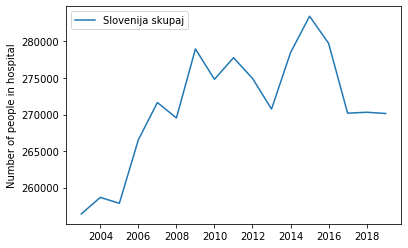

In [44]:
plt.plot(list(dictot.keys()), list(dictot.values()),label = "Slovenija skupaj")
plt.ylabel('Number of people in hospital')
plt.legend()
plt.show()

In [45]:
regijalist= []
for i in regija:
    regijalist.append(i)
regijalist = list(set(regijalist))
print(regijalist)

['Tujina', 'Primorsko-notranjska', 'Posavska', 'Gorenjska', 'Goriška', 'Obalno-kraška', 'Pomurska', 'Savinjska', 'Podravska', 'Jugovzhodna Slovenija', 'Osrednjeslovenska', 'Zasavska', 'SLOVENIJA', 'Koroška']


In [46]:
countreg=0
dictreg = dict()
for regija1 in regijalist:
    if regija1 != ('SLOVENIJA'):
        for j in range(0,len(regija)):
            if regija1 == regija[j]:
               
                countreg += int(dataset[j])
        dictreg[regija1] = countreg
        countreg=0
dictreg = dict(sorted(dictreg.items()))

In this part we made a comparison of the occupancy between the statistical regions and we can see that the region "Osrednjoslovenska" is the most occupied, after it come "Podravska" and "Savinjska". The least occupied is the statistical region "Tujina" which says that most of the slovenian people are treated in slovenian hospitals

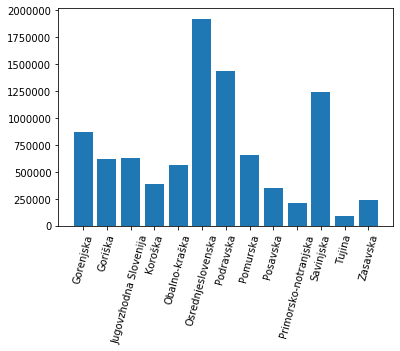

In [47]:
index = np.arange(len(list(dictreg.keys())))
plt.bar(list(dictreg.keys()), list(dictreg.values()))
plt.xticks(index, list(dictreg.keys()) , fontsize=10, rotation=75)
plt.show()

In [48]:
countgrm=0
countgrz=0
dictgr = dict()
for regija1 in regijalist:
    if regija1 != ('SLOVENIJA'):
        for j in range(0,len(regija)):
            if regija1 == regija[j] and spol[j] == "Ženski":
                countgrz += int(dataset[j])
            if regija1 == regija[j] and spol[j] == "Moški":
                countgrm += int(dataset[j])      
        dictgr[regija1] = (countgrz, countgrm)
        countgrz=0
        countgrm=0
print(dictgr)
print(len(dictgr))

{'Tujina': (22553, 22782), 'Primorsko-notranjska': (53049, 49965), 'Posavska': (91636, 83888), 'Gorenjska': (237114, 198985), 'Goriška': (161054, 147189), 'Obalno-kraška': (152237, 129278), 'Pomurska': (181547, 147205), 'Savinjska': (334265, 287490), 'Podravska': (392258, 328481), 'Jugovzhodna Slovenija': (162636, 153439), 'Osrednjeslovenska': (514768, 447290), 'Zasavska': (62980, 54858), 'Koroška': (101540, 91637)}
13


Also we compared the males and females based on the statistical regions and we can see that in almost every region there are more women in the hospital than the men 

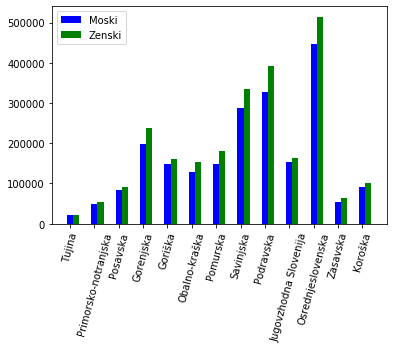

In [49]:
m = []
z = []

for val in dictgr.values():
    m.append(val[1])
    z.append(val[0])
X = np.arange(len(m))
plt.bar( X+ 0.00, m, color = 'b', width = 0.25, label="Moski")
plt.bar(X + 0.25, z, color = 'g', width = 0.25, label = "Zenski")
plt.xticks(X, list(dictgr.keys()) , fontsize=10, rotation=75)
plt.legend()
plt.show()
